# Handgeschriebene Zahlen generieren
Ziel ist es ein generatives Netzwerk zu erzeugen. Dieses soll Bilder von Zahlen erzeugen die Handschriftlich ausehen. 
SkiKit-Learn liefert einen passenden Datensatz.

In [1]:
from sklearn import datasets

digits = datasets.load_digits()


Dieser enthält schwarzweiß Bilder mit 16 Pixeln. Das Objekt ist ein Dictionary mit dem sich die Daten als Tabelle erzeugen lassen. Spaltennamen sind feature_names und in data liegen dann die Werte. Ein Pixel kann die ganzzahligen Werte 0-16 annehmen. Die erwartete Zahl wird durch target angegeben. Enthalten sind 1797 Bilder. Eine beschreibung liefert auch print(digits.DESCR)

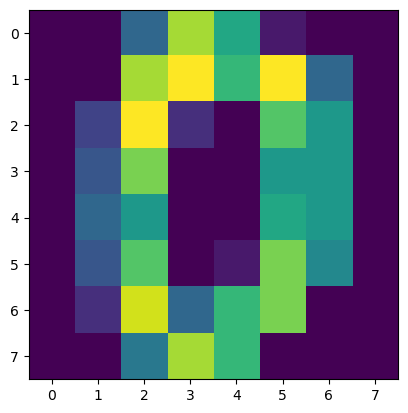

In [19]:
import matplotlib.pyplot as plt
import numpy as np
img = np.reshape(digits.data[0], (8,8))
plt.imshow(img)

Um einen Generator zu trainieren bracht es ein Modell, dass als Bewertung dient. Dafür wird ein gefaltetes Netz trainiert. 

In [109]:
from sklearn.model_selection import train_test_split
import keras 

data = []
for d in digits.data:
    data.append(np.reshape(d, (8, 8, 1)))

data = np.array(data)
data /= 16 # for a neural network to work well, it must deal with input values close to unity

X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.1, shuffle=False
)

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)


In [96]:
import keras 
from keras.datasets import mnist 
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Flatten 
from keras.layers import Conv2D, MaxPooling2D
from keras.metrics import Accuracy

model = Sequential() 
model.add(Conv2D(32, kernel_size = (3, 3),  
   activation = 'relu', input_shape = (8, 8, 1))) 
model.add(Conv2D(64, (3, 3), activation = 'relu')) 
model.add(MaxPooling2D(pool_size = (2, 2))) 
model.add(Dropout(0.25)) 
model.add(Flatten()) 
model.add(Dense(128, activation = 'relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = keras.losses.categorical_crossentropy, 
   optimizer = keras.optimizers.Adadelta(), metrics = [Accuracy()])


In [68]:
from keras import backend as K 
print(len(X_train[0][0]))
print(len(y_train))
K.image_data_format()

8
1617


'channels_last'

In [110]:
model.fit(
   X_train, y_train, 
   batch_size = 128, 
   epochs = 12, 
   verbose = 1, 
   validation_data = (X_test, y_test)
)

Epoch 1/12


TypeError: 'NoneType' object is not callable